In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [81]:
# Load the Sales data
sales_data = pd.read_csv('Case2_Sales data.csv', delimiter=';')

In [82]:
sales_data.head()

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [83]:
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'], errors='coerce')
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'], dayfirst=True)

# Aggregating sales data to a monthly level
monthly_sales_data = sales_data.groupby([sales_data['DATE'].dt.year.rename('Year'),
                                          sales_data['DATE'].dt.month.rename('Month'),
                                          'Mapped_GCK'])['Sales_EUR'].sum().reset_index()

In [84]:
# load the market data for analysis
market_data = pd.read_excel('Case2_Market data.xlsx')

In [85]:
market_data.head()

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,...,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,...,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,...,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
4,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983


In [86]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           221 non-null    object
 1   China                221 non-null    object
 2   China.1              221 non-null    object
 3   France               221 non-null    object
 4   France.1             221 non-null    object
 5   Germany              221 non-null    object
 6   Germany.1            221 non-null    object
 7   Italy                221 non-null    object
 8   Italy.1              221 non-null    object
 9   Japan                221 non-null    object
 10  Japan.1              221 non-null    object
 11  Switzerland          220 non-null    object
 12  Switzerland.1        220 non-null    object
 13  United Kingdom       221 non-null    object
 14  United Kingdom.1     203 non-null    object
 15  United States        221 non-null    object
 16  United S

In [128]:
# Monthly sales aggregation with corrected sales figures
monthly_sales_corrected = sales_data.groupby([sales_data['DATE'].dt.to_period('M'), 'Mapped_GCK'])['Sales_EUR'].sum().unstack(fill_value=0)

monthly_sales_corrected.head()

Mapped_GCK,#1,#11,#12,#13,#14,#16,#20,#3,#36,#4,#5,#6,#8,#9
DATE,,,,,,,,,,,,,,
2018-10,0.0,340091.0,0.0,0.0,5770.0,205995.0,348.0,23680.0,1224.0,0.0,0.0,0.0,0.0,3016.0
2018-11,0.0,1195336.0,1070.0,43677.0,17130.0,828478.0,0.0,-6580.0,6650.0,0.0,0.0,29807.0,-500.0,0.0
2018-12,0.0,1226122.0,0.0,550.0,0.0,38028.0,503.0,0.0,6593.0,0.0,0.0,0.0,0.0,0.0
2019-01,0.0,1113149.0,21484.0,0.0,0.0,134946.0,120.0,0.0,182.0,0.0,0.0,0.0,0.0,1487.0
2019-02,0.0,191455.0,0.0,0.0,0.0,50944.0,259.0,0.0,435.0,0.0,0.0,108440.0,0.0,0.0


In [88]:
market_data = pd.read_excel('Case2_Market data.xlsx', skiprows=2)

In [89]:
# Split the 'date' column into 'Year' and 'Month'
market_data[['Year', 'Month']] = market_data['date'].str.extract(r'(\d{4})m(\d{1,2})')

# Convert 'Year' and 'Month' to numeric
market_data['Year'] = pd.to_numeric(market_data['Year'])
market_data['Month'] = pd.to_numeric(market_data['Month'])

In [90]:
# Check the data types of 'Year' and 'Month' columns in both datasets
print(market_data.dtypes[['Year', 'Month']])
print(monthly_sales_data.dtypes[['Year', 'Month']])

# Ensure both 'Year' and 'Month' columns are of integer type for consistent merging
market_data['Year'] = market_data['Year'].astype(int)
market_data['Month'] = market_data['Month'].astype(int)

Year     int64
Month    int64
dtype: object
Year     int32
Month    int32
dtype: object


In [91]:
merged_data = pd.merge(monthly_sales_data, market_data, on=['Year', 'Month'], how='left')

In [92]:
print(merged_data)

     Year  Month Mapped_GCK  Sales_EUR     date  MAB_ELE_PRO156  \
0    2018     10         #1        0.0  2018m10      211.955755   
1    2018     10        #11   340091.0  2018m10      211.955755   
2    2018     10        #12        0.0  2018m10      211.955755   
3    2018     10        #13        0.0  2018m10      211.955755   
4    2018     10        #14     5770.0  2018m10      211.955755   
..    ...    ...        ...        ...      ...             ...   
597  2022      4         #4        0.0   2022m4      267.373145   
598  2022      4         #5    -5000.0   2022m4      267.373145   
599  2022      4         #6     6350.0   2022m4      267.373145   
600  2022      4         #8       41.0   2022m4      267.373145   
601  2022      4         #9     3285.0   2022m4      267.373145   

     MAB_ELE_SHP156  MAB_ELE_PRO250  MAB_ELE_SHP250  MAB_ELE_PRO276  ...  \
0        211.955755      108.280608      122.451734      124.227879  ...   
1        211.955755      108.280608      12

In [93]:
merged_data.head()

,Year,Month,Mapped_GCK,Sales_EUR,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2018,10,#1,0.0,2018m10,211.955755,211.955755,108.280608,122.451734,124.227879,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
1,2018,10,#11,340091.0,2018m10,211.955755,211.955755,108.280608,122.451734,124.227879,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
2,2018,10,#12,0.0,2018m10,211.955755,211.955755,108.280608,122.451734,124.227879,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
3,2018,10,#13,0.0,2018m10,211.955755,211.955755,108.280608,122.451734,124.227879,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
4,2018,10,#14,5770.0,2018m10,211.955755,211.955755,108.280608,122.451734,124.227879,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233


### Handling Missing DATA

<Axes: >

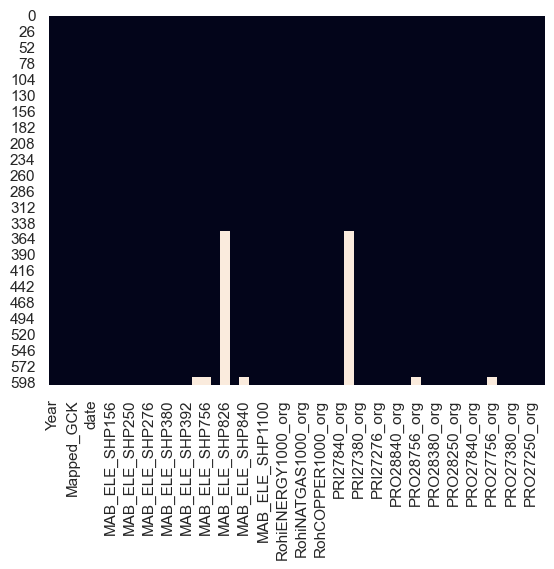

In [94]:
#Visualizing Missing Data
sns.heatmap(merged_data.isnull(), cbar=False)

<Axes: >

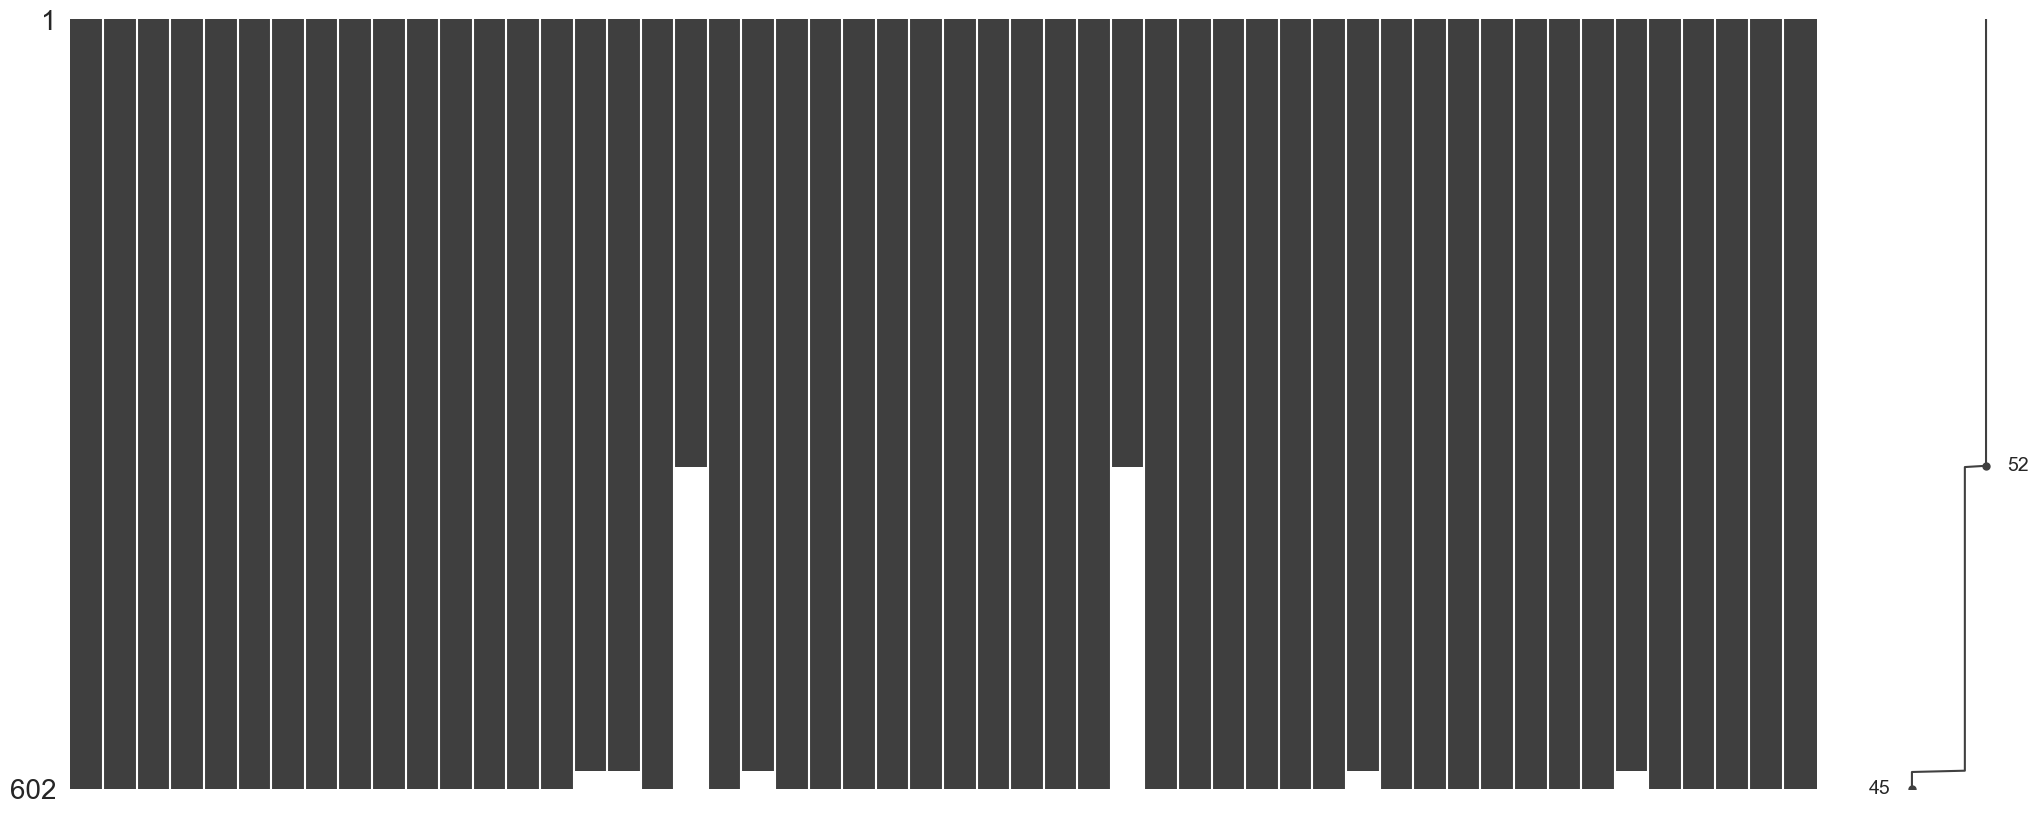

In [95]:
# Second Visulisation
import missingno as msno
msno.matrix(merged_data)

In [96]:
merged_data.isnull().sum()

Year                        0
Month                       0
Mapped_GCK                  0
Sales_EUR                   0
date                        0
MAB_ELE_PRO156              0
MAB_ELE_SHP156              0
MAB_ELE_PRO250              0
MAB_ELE_SHP250              0
MAB_ELE_PRO276              0
MAB_ELE_SHP276              0
MAB_ELE_PRO380              0
MAB_ELE_SHP380              0
MAB_ELE_PRO392              0
MAB_ELE_SHP392              0
MAB_ELE_PRO756             14
MAB_ELE_SHP756             14
MAB_ELE_PRO826              0
MAB_ELE_SHP826            252
MAB_ELE_PRO840              0
MAB_ELE_SHP840             14
MAB_ELE_PRO1100             0
MAB_ELE_SHP1100             0
RohiBASEMET1000_org         0
RohiENERGY1000_org          0
RohiMETMIN1000_org          0
RohiNATGAS1000_org          0
RohCRUDE_PETRO1000_org      0
RohCOPPER1000_org           0
WKLWEUR840_org              0
PRI27840_org                0
PRI27826_org              252
PRI27380_org                0
PRI27250_o

In [97]:
# Handling missing values by imputing with the median
for column in merged_data.columns:
    if merged_data[column].isnull().any():
        merged_data[column].fillna(merged_data[column].median(), inplace=True)

In [98]:
merged_data.isnull().sum()

Year                      0
Month                     0
Mapped_GCK                0
Sales_EUR                 0
date                      0
MAB_ELE_PRO156            0
MAB_ELE_SHP156            0
MAB_ELE_PRO250            0
MAB_ELE_SHP250            0
MAB_ELE_PRO276            0
MAB_ELE_SHP276            0
MAB_ELE_PRO380            0
MAB_ELE_SHP380            0
MAB_ELE_PRO392            0
MAB_ELE_SHP392            0
MAB_ELE_PRO756            0
MAB_ELE_SHP756            0
MAB_ELE_PRO826            0
MAB_ELE_SHP826            0
MAB_ELE_PRO840            0
MAB_ELE_SHP840            0
MAB_ELE_PRO1100           0
MAB_ELE_SHP1100           0
RohiBASEMET1000_org       0
RohiENERGY1000_org        0
RohiMETMIN1000_org        0
RohiNATGAS1000_org        0
RohCRUDE_PETRO1000_org    0
RohCOPPER1000_org         0
WKLWEUR840_org            0
PRI27840_org              0
PRI27826_org              0
PRI27380_org              0
PRI27250_org              0
PRI27276_org              0
PRI27156_org        

### Checking for Negative Values

In [99]:
# Select only numeric columns for the comparison
numeric_cols = merged_data.select_dtypes(include=[ 'float', 'int'])

# Check for negative values across the numeric columns
negative_values = (numeric_cols < 0).sum()

print(negative_values)

Year                       0
Month                      0
Sales_EUR                 26
MAB_ELE_PRO156             0
MAB_ELE_SHP156             0
MAB_ELE_PRO250             0
MAB_ELE_SHP250             0
MAB_ELE_PRO276             0
MAB_ELE_SHP276             0
MAB_ELE_PRO380             0
MAB_ELE_SHP380             0
MAB_ELE_PRO392             0
MAB_ELE_SHP392             0
MAB_ELE_PRO756             0
MAB_ELE_SHP756             0
MAB_ELE_PRO826             0
MAB_ELE_SHP826             0
MAB_ELE_PRO840             0
MAB_ELE_SHP840             0
MAB_ELE_PRO1100            0
MAB_ELE_SHP1100            0
RohiBASEMET1000_org        0
RohiENERGY1000_org         0
RohiMETMIN1000_org         0
RohiNATGAS1000_org         0
RohCRUDE_PETRO1000_org     0
RohCOPPER1000_org          0
WKLWEUR840_org             0
PRI27840_org               0
PRI27826_org               0
PRI27380_org               0
PRI27250_org               0
PRI27276_org               0
PRI27156_org               0
PRO28840_org  

In [100]:
# There are other ways to deal with negative values but in this situation absolute value would be ideal
merged_data['Sales_EUR'] = merged_data['Sales_EUR'].abs()

In [101]:
merged_data['Sales_EUR'].head()

0         0.0
1    340091.0
2         0.0
3         0.0
4      5770.0
Name: Sales_EUR, dtype: float64

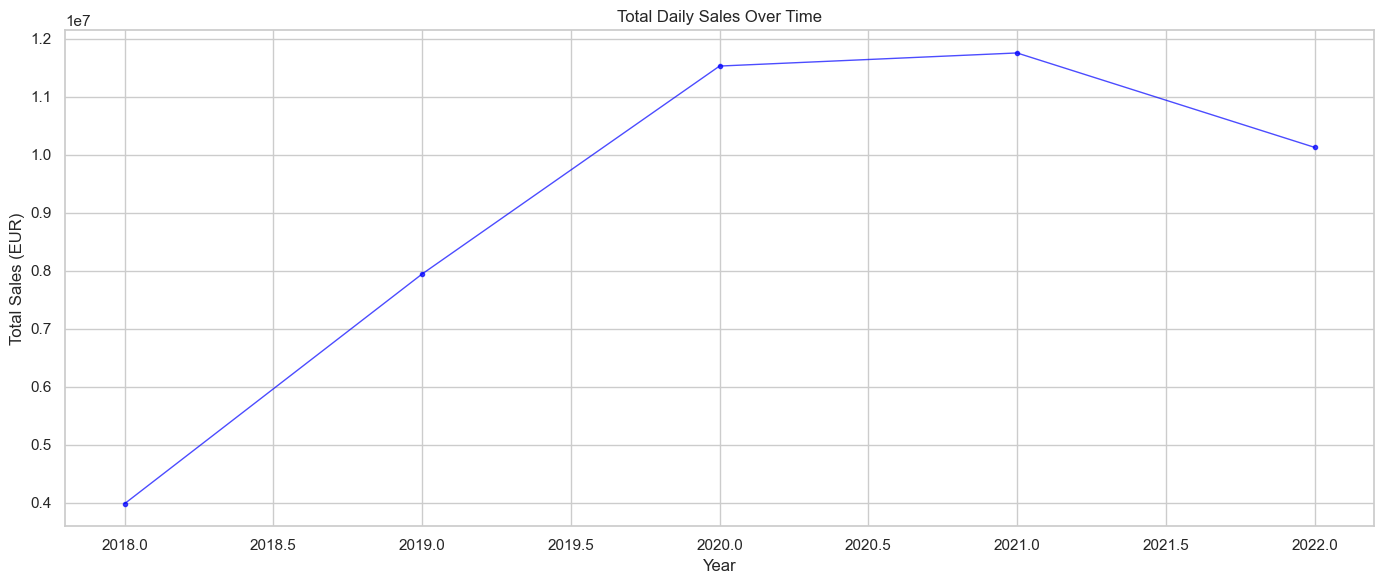

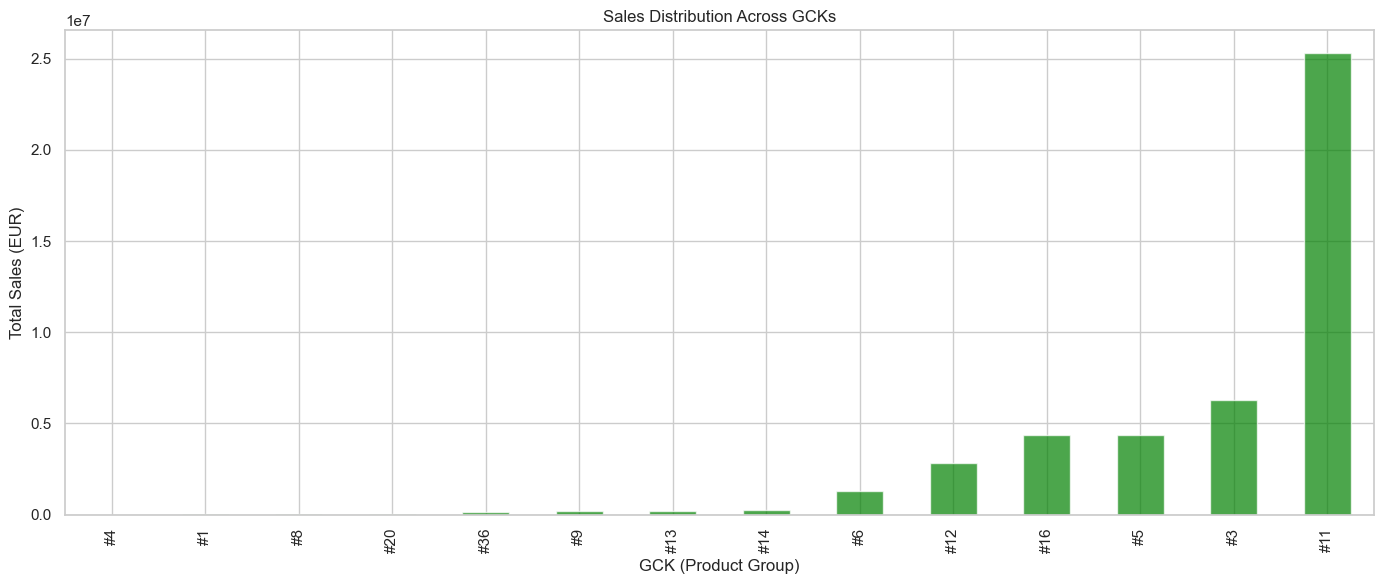

In [112]:
# Setting up the visualizations style
sns.set(style="whitegrid")

# 1. Sales Trends Over Time
plt.figure(figsize=(14, 6))
merged_data.groupby('Year')['Sales_EUR'].sum().plot(kind='line', color='blue', marker='.', linewidth=1, alpha=0.7)
plt.title('Total Daily Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales (EUR)')
plt.tight_layout()
plt.show()

# 2. Sales Distribution Across GCKs
plt.figure(figsize=(14, 6))
merged_data.groupby('Mapped_GCK')['Sales_EUR'].sum().sort_values().plot(kind='bar', color='green', alpha=0.7)
plt.title('Sales Distribution Across GCKs')
plt.xlabel('GCK (Product Group)')
plt.ylabel('Total Sales (EUR)')
plt.tight_layout()
plt.show()

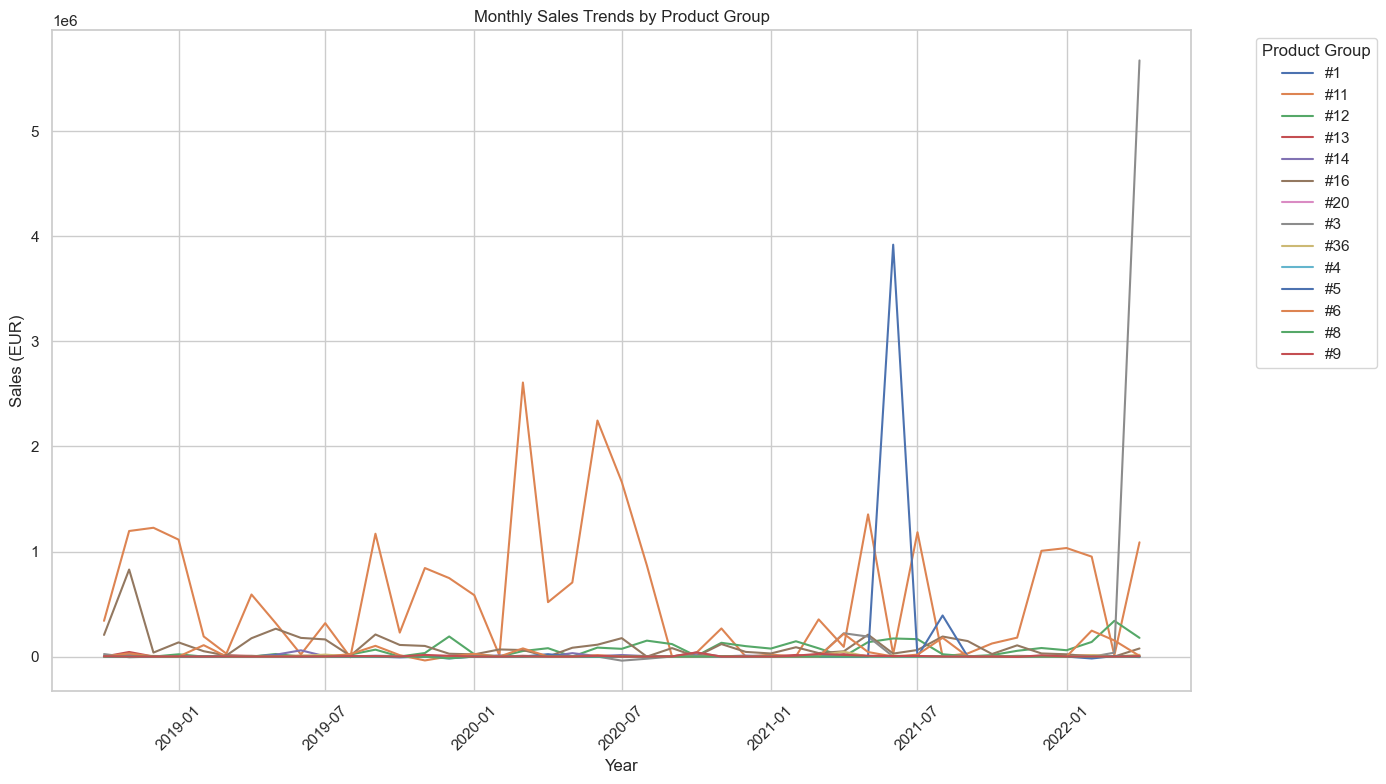

In [113]:
# Aggregate sales data on a monthly basis for each product group
Merged_data = sales_data.groupby([sales_data['DATE'].dt.to_period('M'), 'Mapped_GCK'])['Sales_EUR'].sum().unstack()

# Plot the monthly sales trends for each product group
plt.figure(figsize=(14, 8))
for column in monthly_sales.columns:
    plt.plot(monthly_sales.index.to_timestamp(), monthly_sales[column], label=column)

plt.title('Monthly Sales Trends by Product Group')
plt.xlabel('Year')
plt.ylabel('Sales (EUR)')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Handling outliers

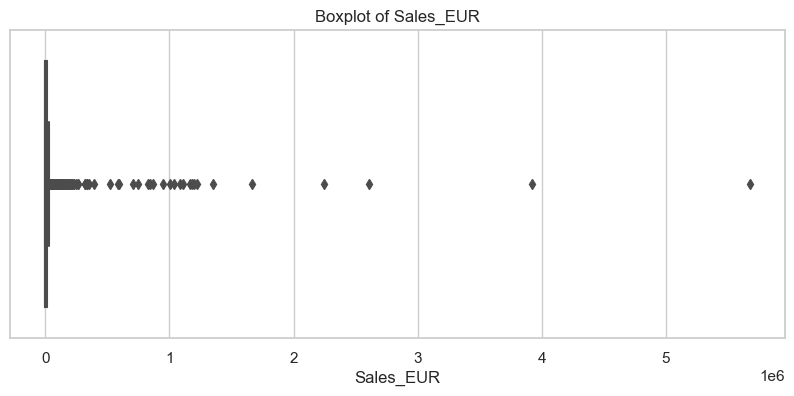

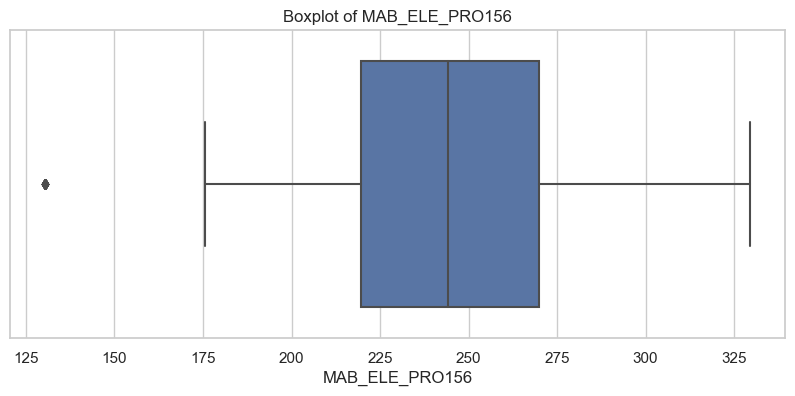

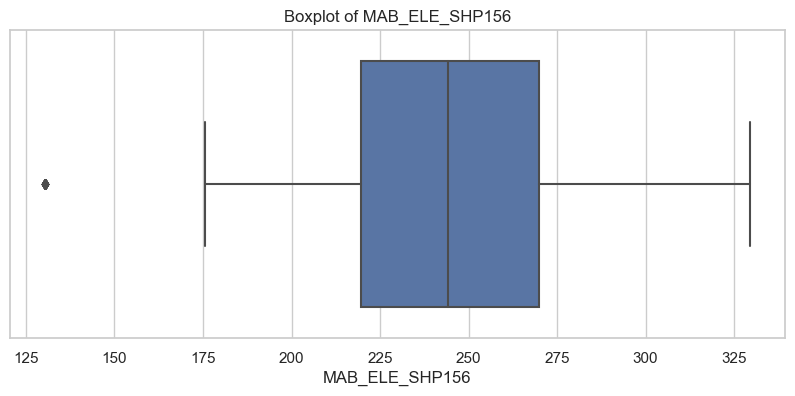

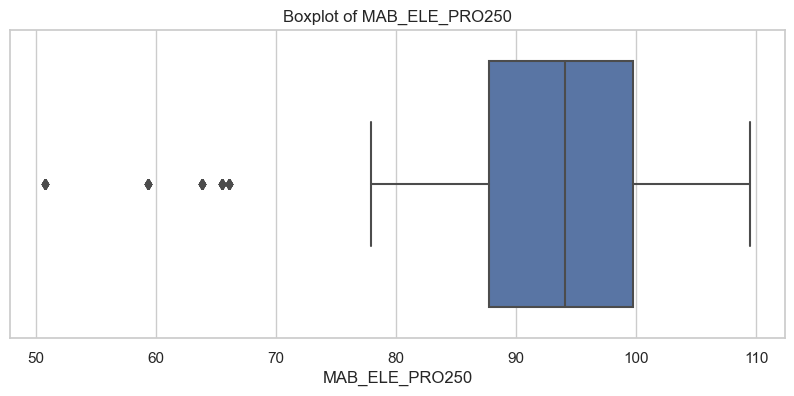

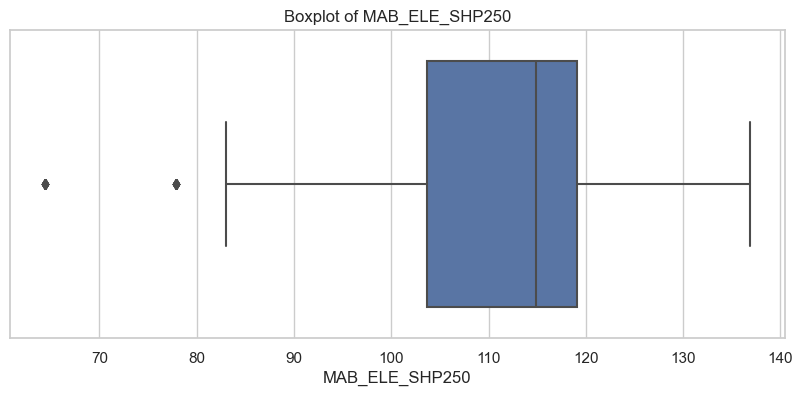

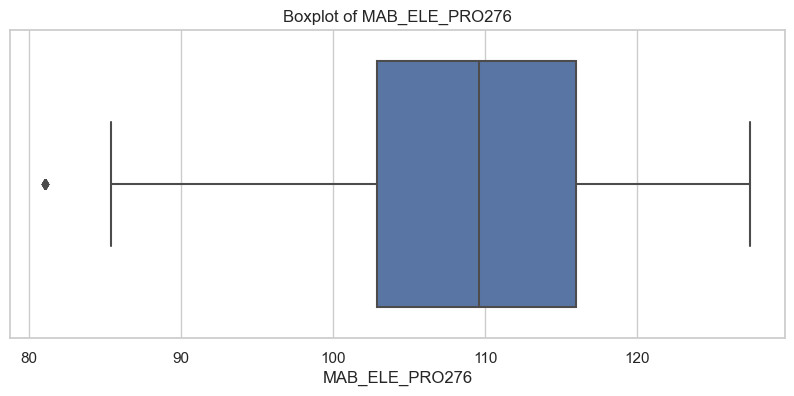

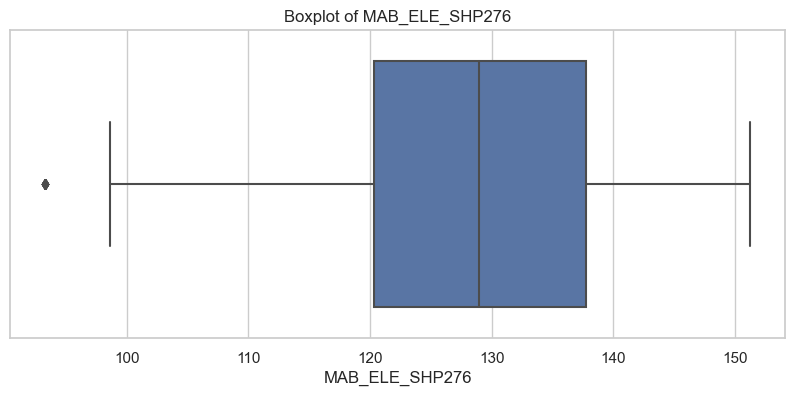

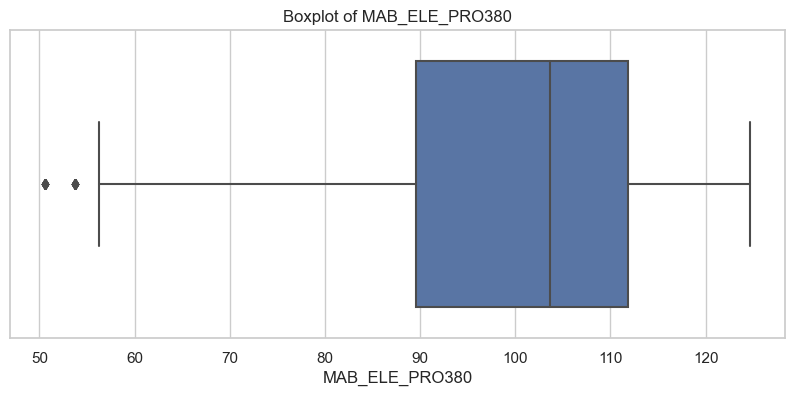

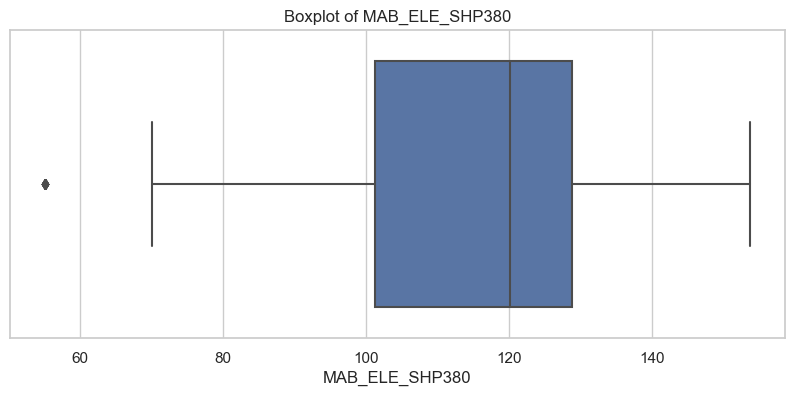

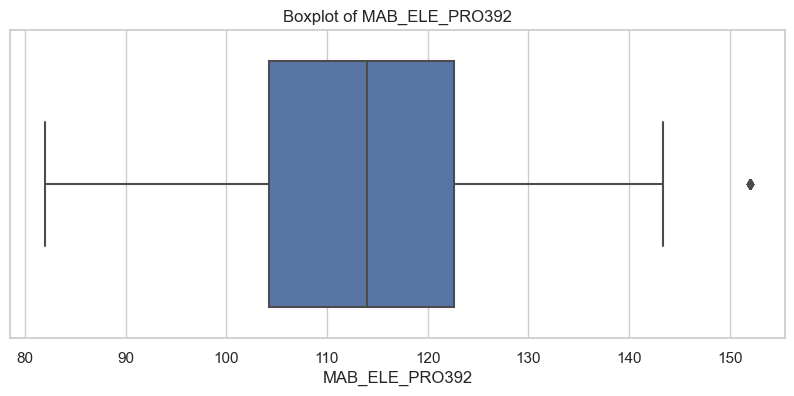

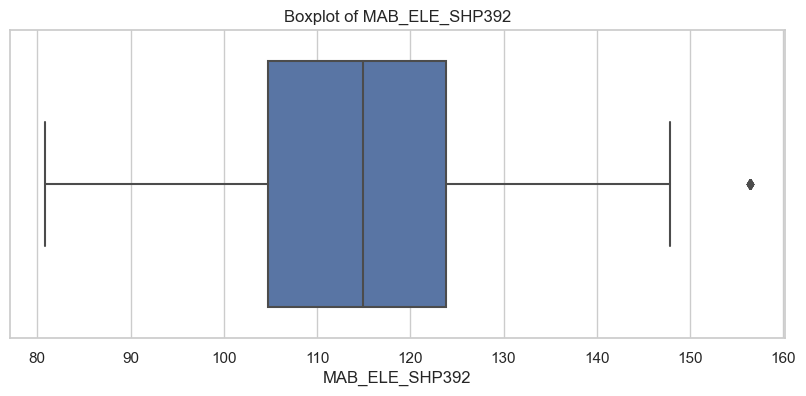

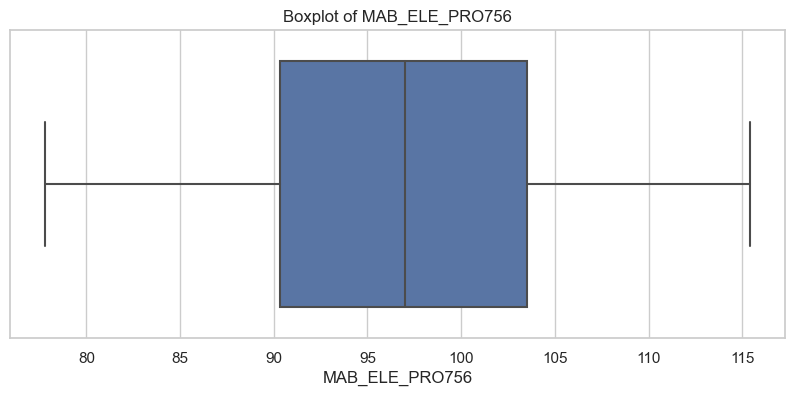

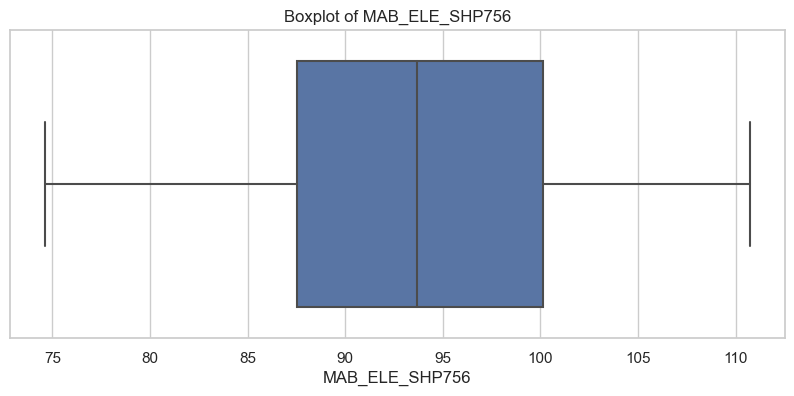

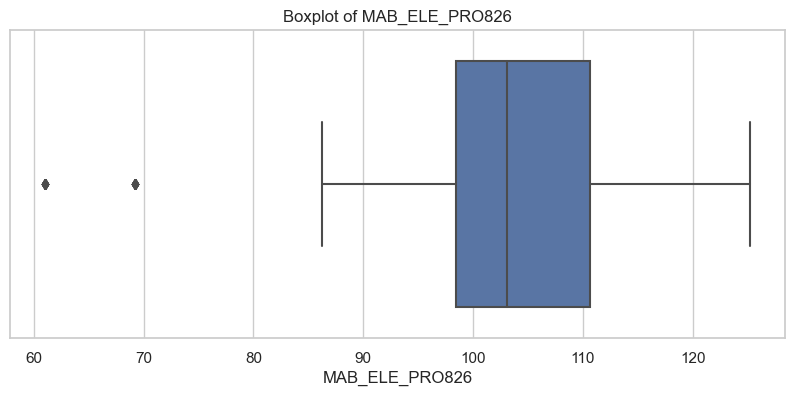

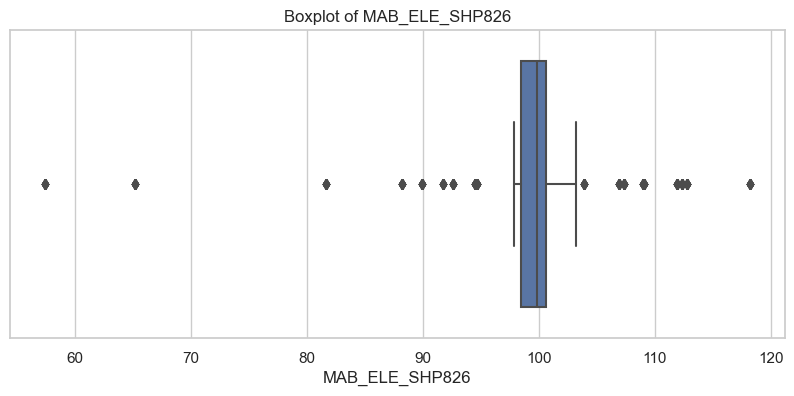

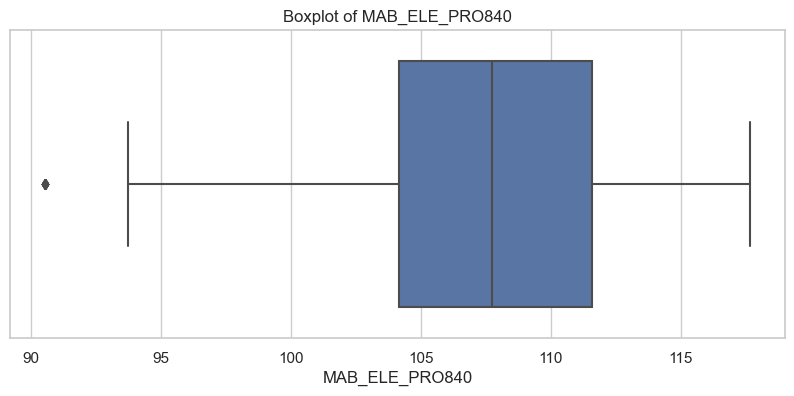

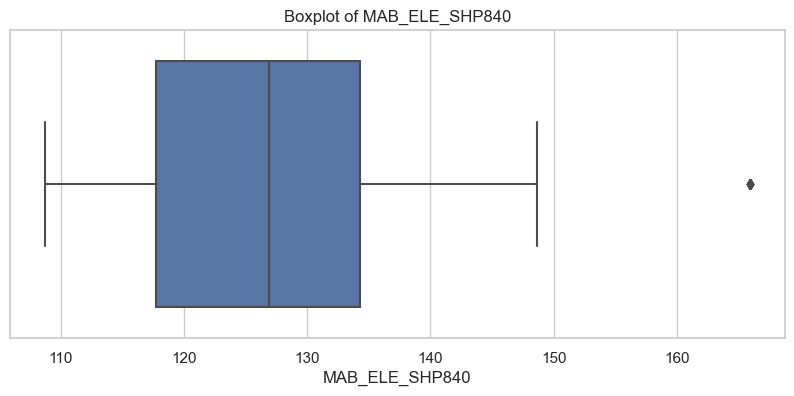

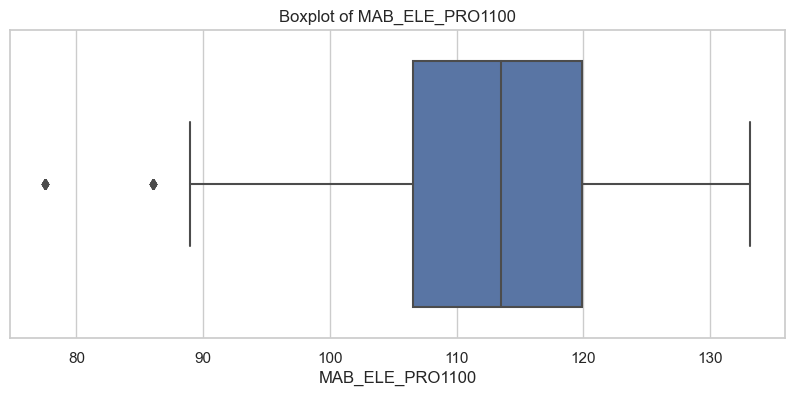

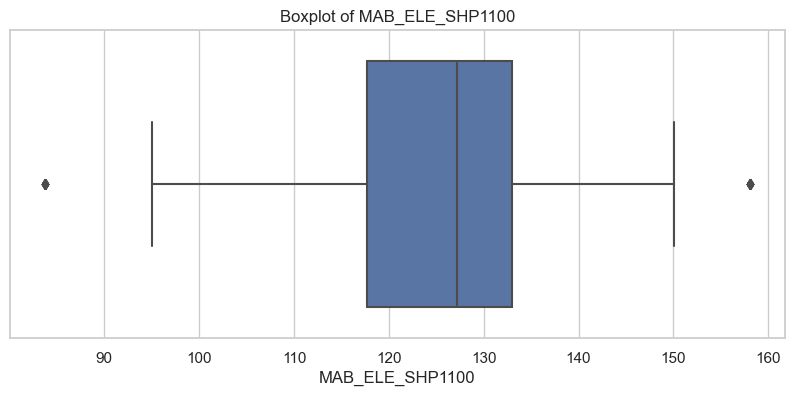

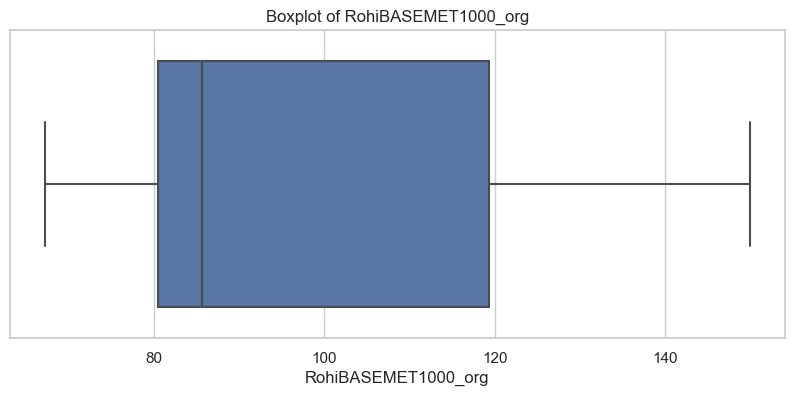

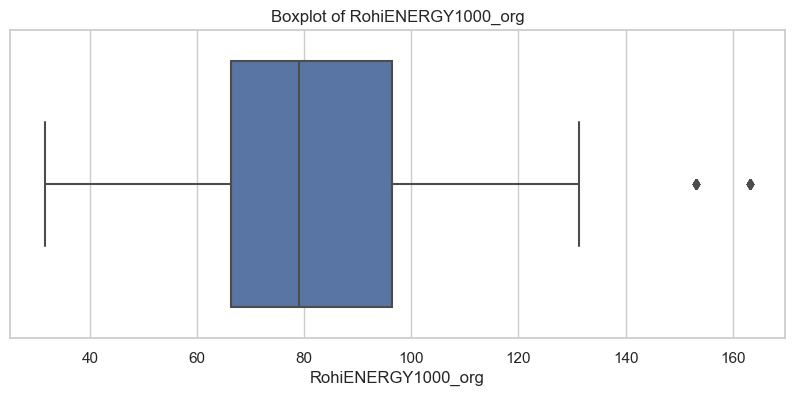

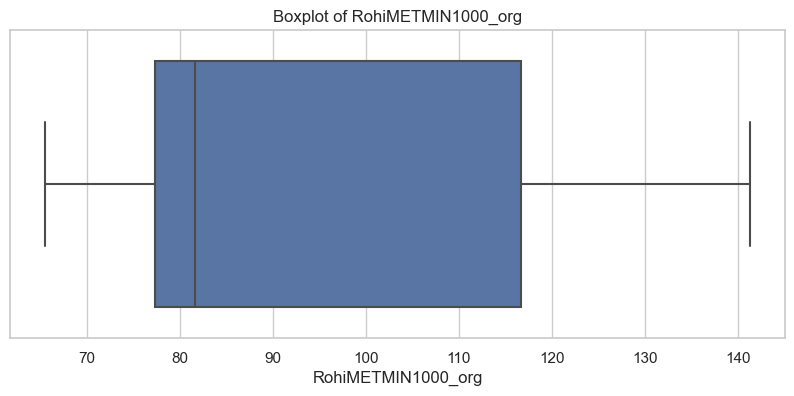

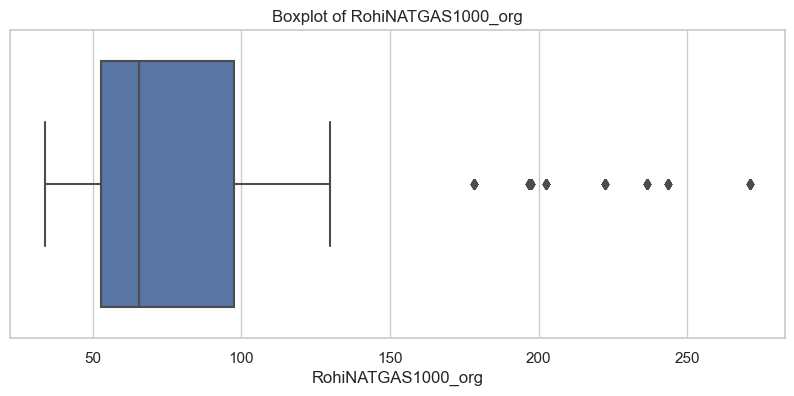

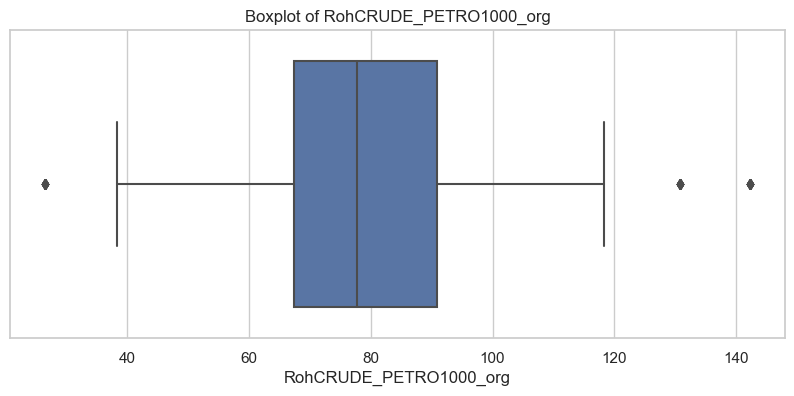

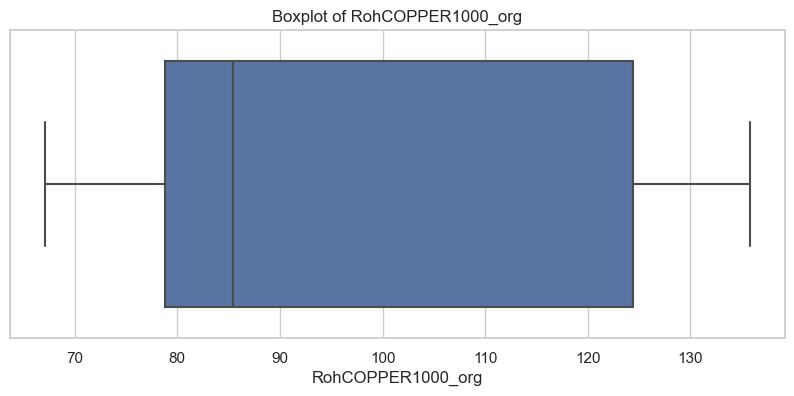

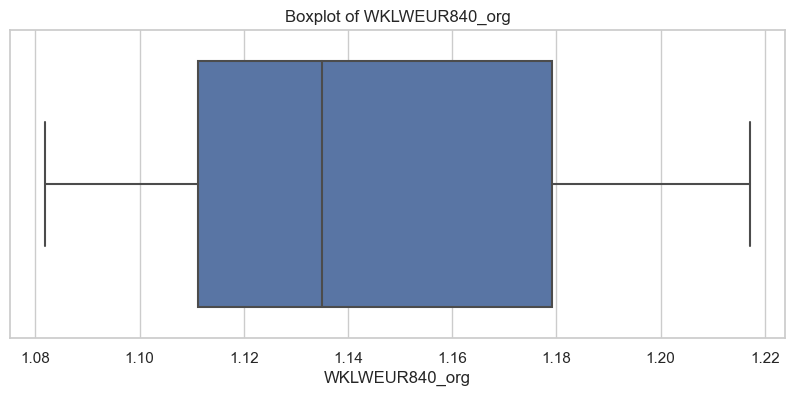

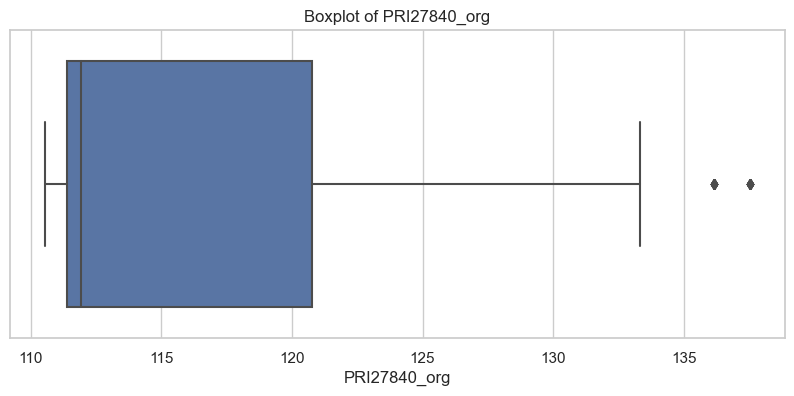

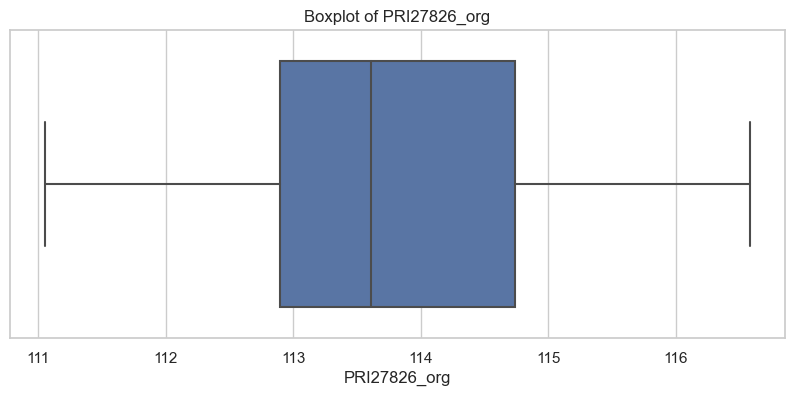

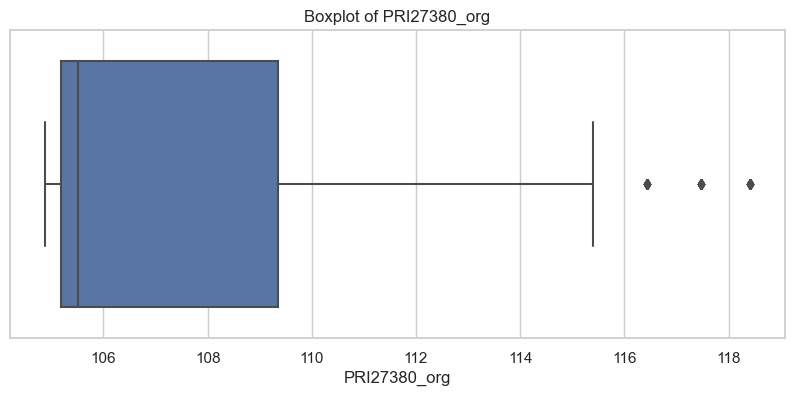

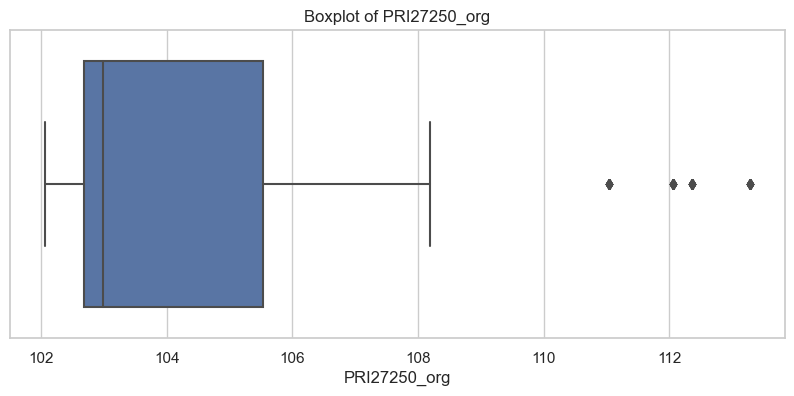

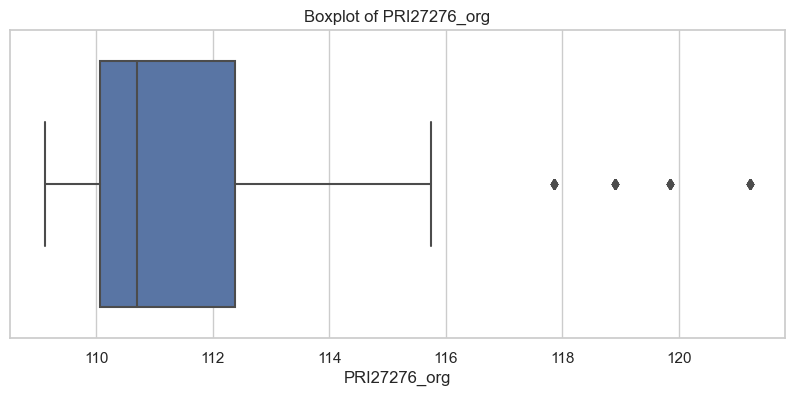

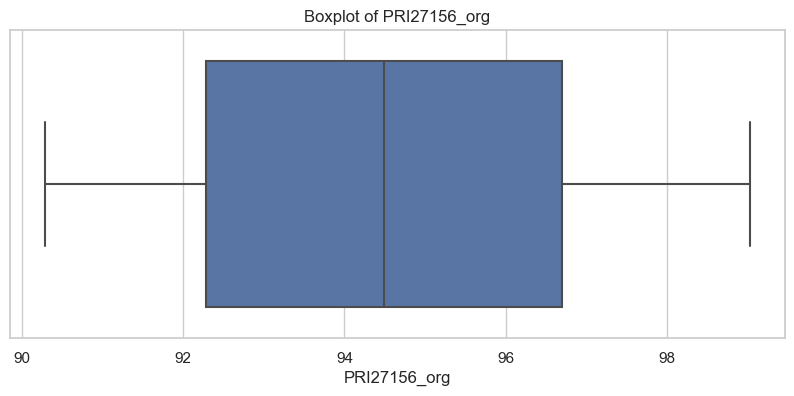

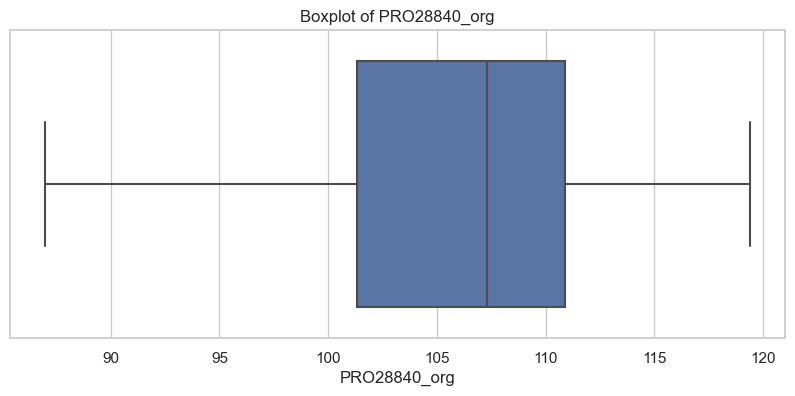

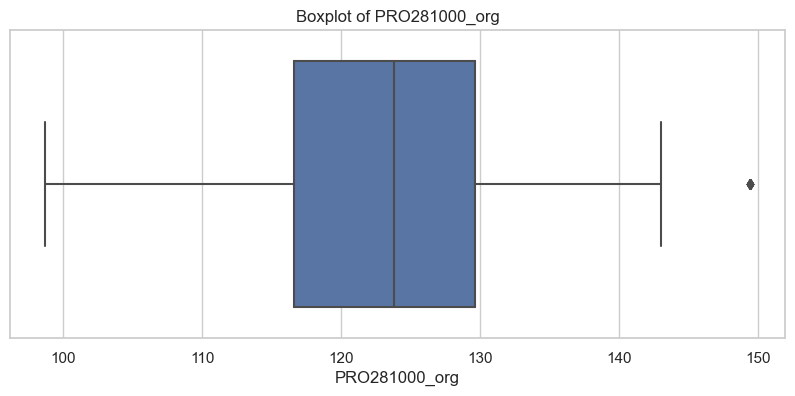

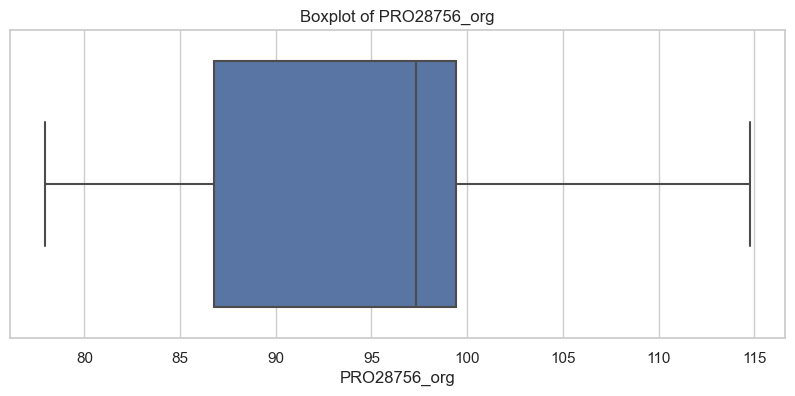

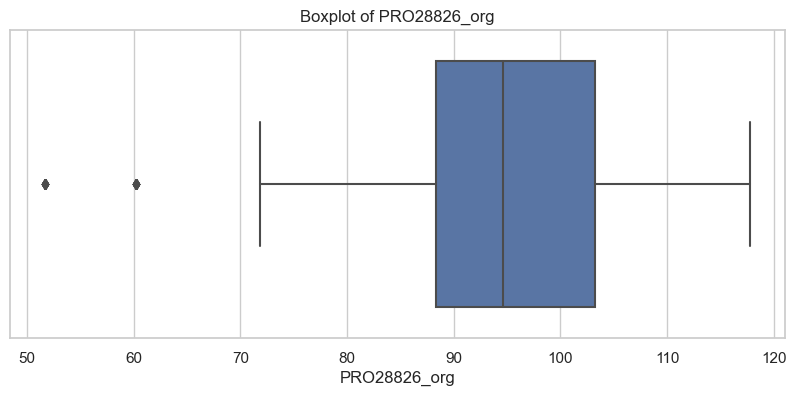

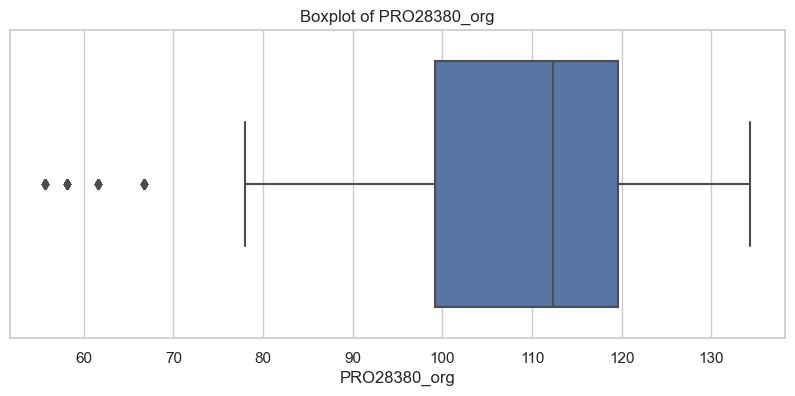

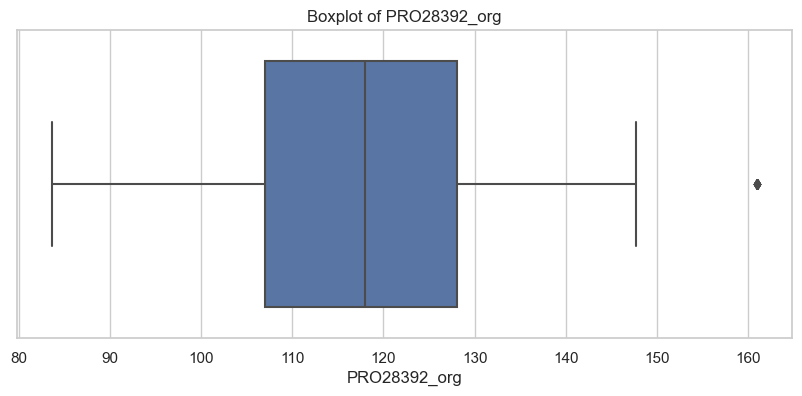

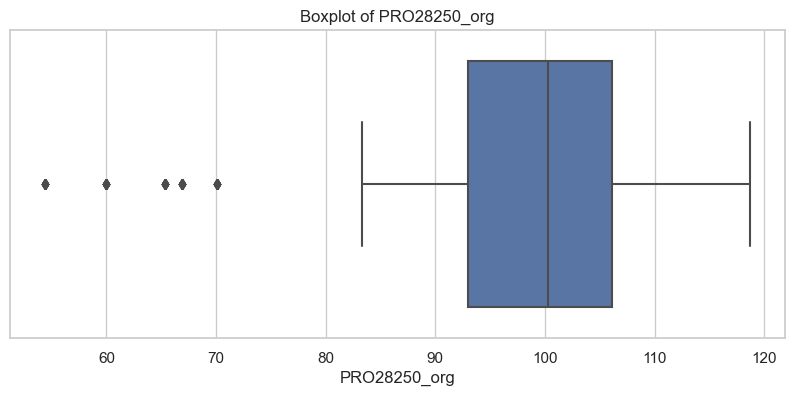

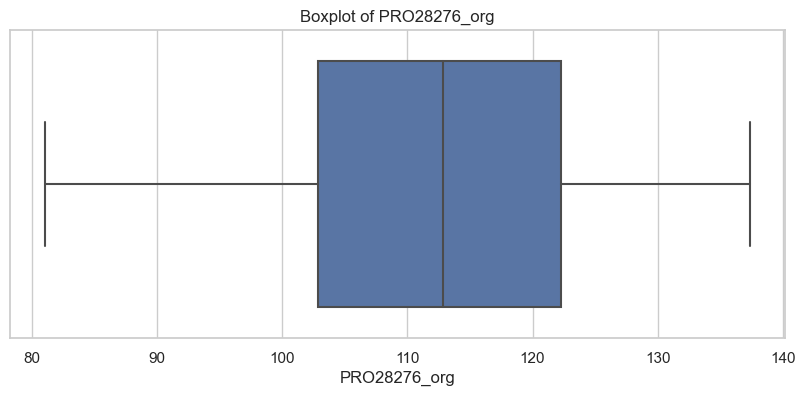

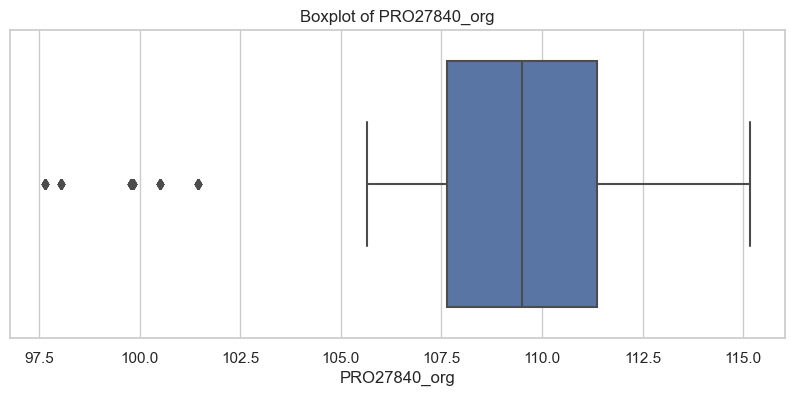

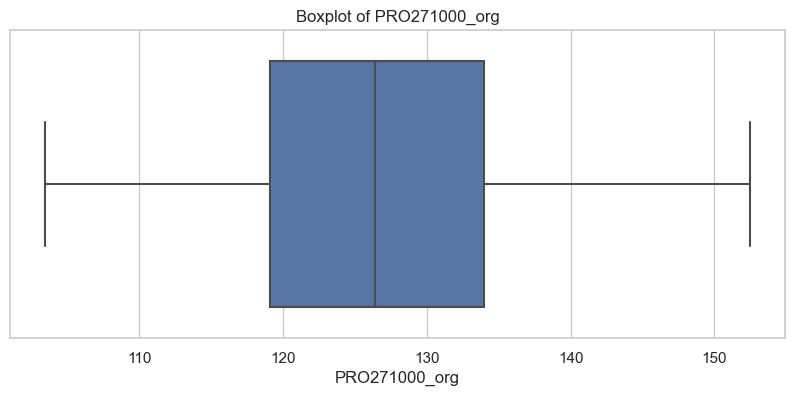

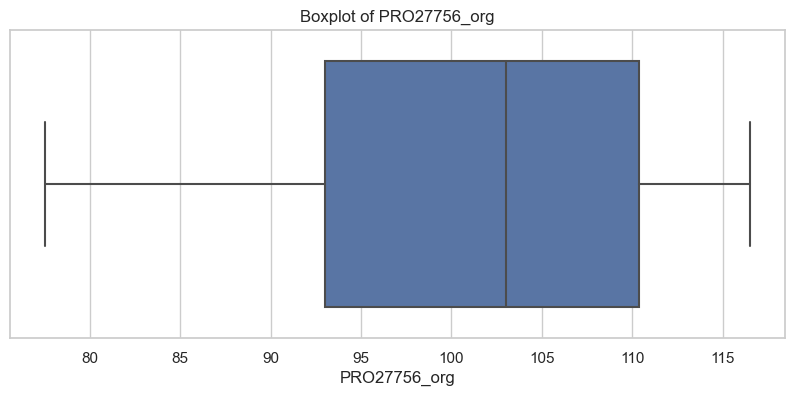

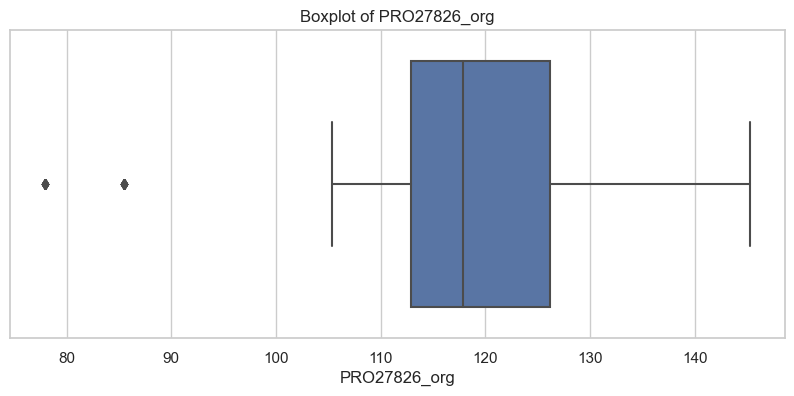

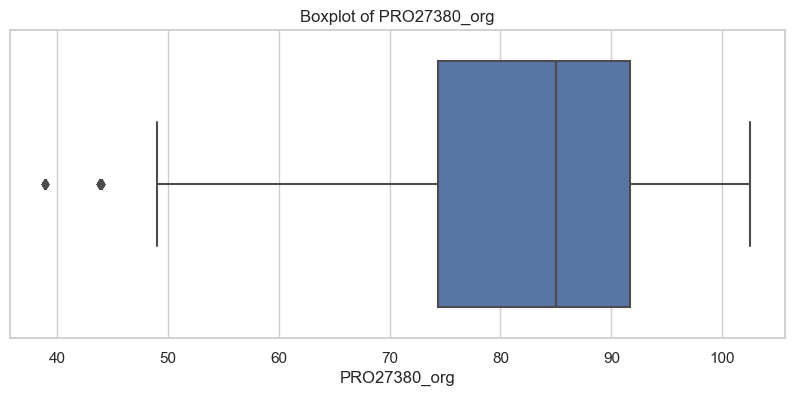

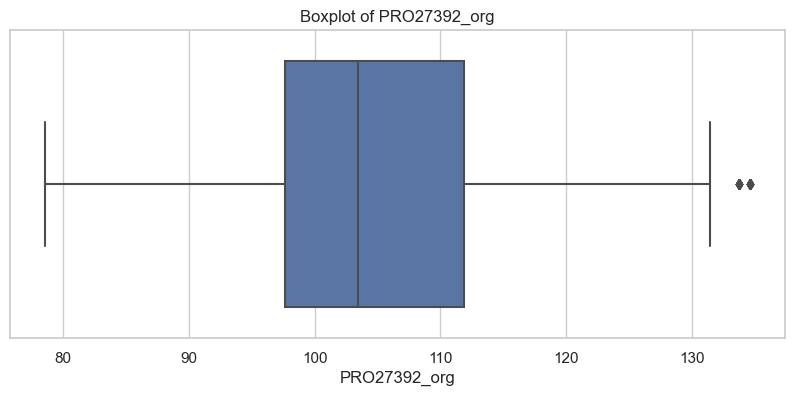

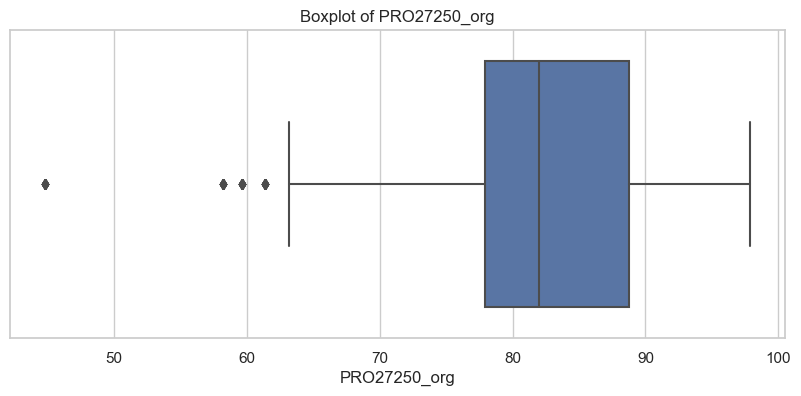

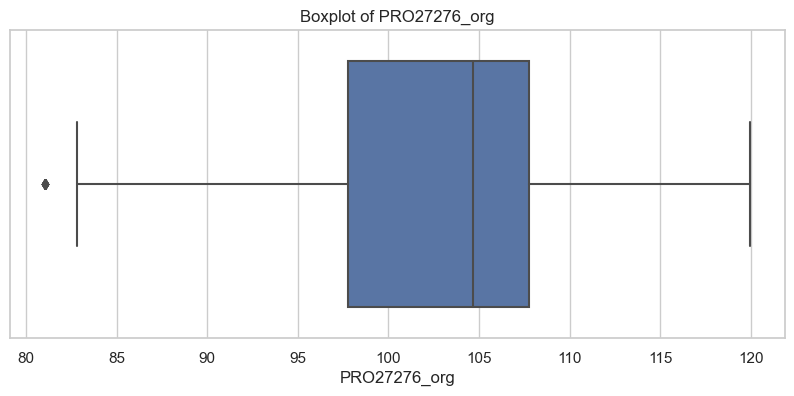

In [114]:
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns  # Adjust types as necessary
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=merged_data[col])
    plt.title('Boxplot of ' + col)
    plt.show()

In [119]:
from scipy import stats
import numpy as np

# Assuming 'merged_data' is your DataFrame
z_scores = np.abs(stats.zscore(merged_data.select_dtypes(include=['float64', 'int64'])))
threshold = 3  # Commonly used threshold for Z-score
outliers_rows = np.where(z_scores > threshold)[0]

# Unique rows that contain outliers
unique_outlier_rows = np.unique(outliers_rows)
print(f"Rows with outliers (based on Z-score > {threshold}): {len(unique_outlier_rows)}")

Rows with outliers (based on Z-score > 3): 65


In [121]:
outliers_data = merged_data.iloc[unique_outlier_rows]

In [122]:
print(outliers_data.describe())

              Year      Month     Sales_EUR  MAB_ELE_PRO156  MAB_ELE_SHP156  \
count    65.000000  65.000000  6.500000e+01       65.000000       65.000000   
mean   2020.830769   4.461538  3.941990e+05      271.536441      271.536441   
std       1.111998   1.677768  9.824593e+05       34.070768       34.070768   
min    2018.000000   3.000000  0.000000e+00      215.853833      215.853833   
25%    2020.000000   4.000000  0.000000e+00      241.846854      241.846854   
50%    2020.000000   4.000000  2.052000e+03      255.808160      255.808160   
75%    2022.000000   5.000000  8.396000e+04      283.339382      283.339382   
max    2022.000000  12.000000  5.674979e+06      329.413367      329.413367   

       MAB_ELE_PRO250  MAB_ELE_SHP250  MAB_ELE_PRO276  MAB_ELE_SHP276  \
count       65.000000       65.000000       65.000000       65.000000   
mean        80.303232      100.598751       98.989075      119.517483   
std         21.187318       27.887869       15.975601       22.581450

In [123]:
mean_sales = merged_data['Sales_EUR'].mean()
median_sales = merged_data['Sales_EUR'].median()
print(f"Mean of Sales_EUR: {mean_sales}")
print(f"Median of Sales_EUR: {median_sales}")

Mean of Sales_EUR: 75303.95348837209
Median of Sales_EUR: 323.5


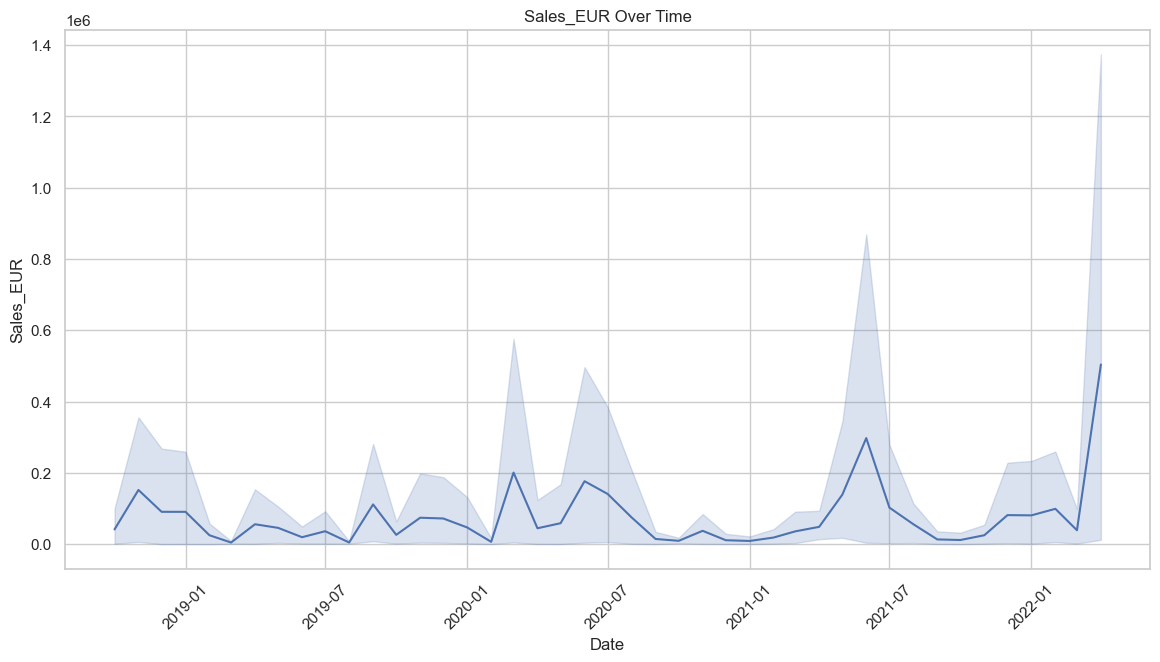

In [124]:
merged_data['Date'] = pd.to_datetime(merged_data['Year'].astype(str) + merged_data['Month'].astype(str), format='%Y%m')
plt.figure(figsize=(14, 7))
merged_data.sort_values('Date', inplace=True)
sns.lineplot(data=merged_data, x='Date', y='Sales_EUR')
plt.xticks(rotation=45)
plt.title('Sales_EUR Over Time')
plt.show()

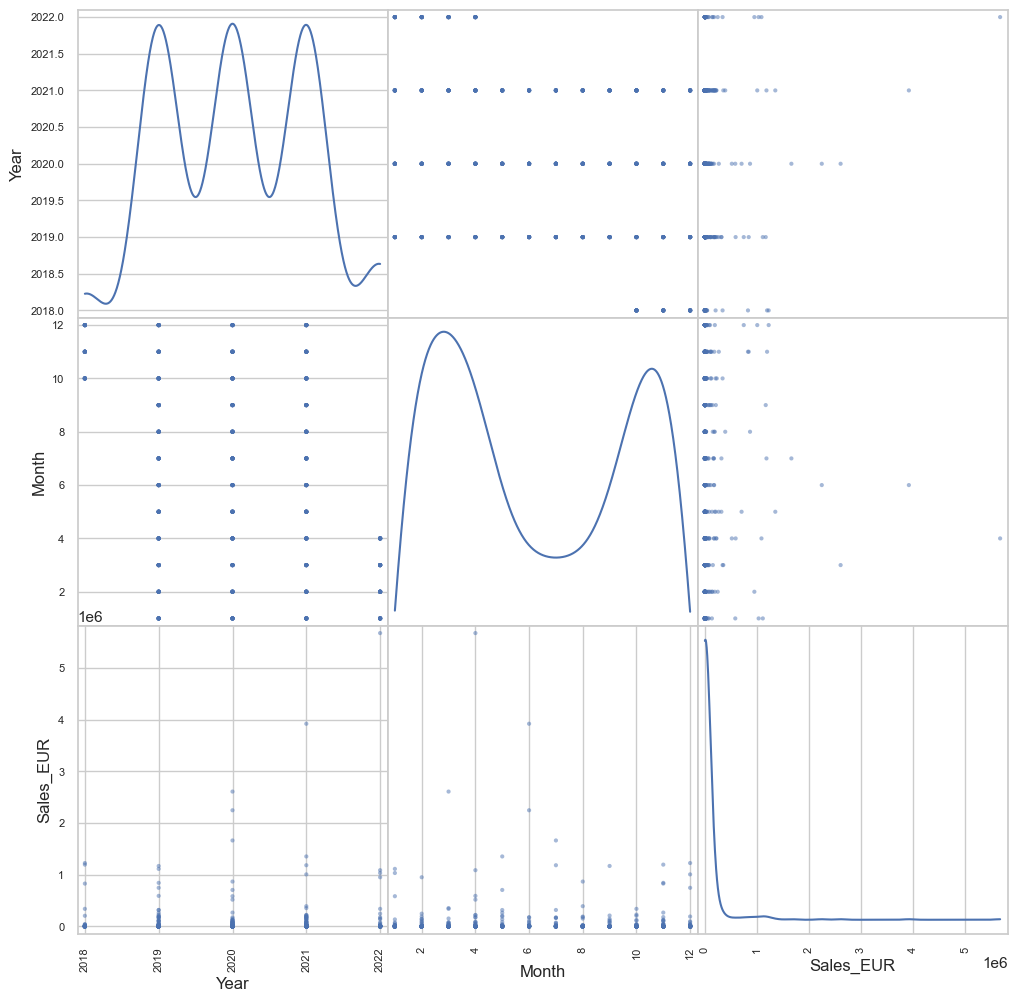

In [126]:
from pandas.plotting import scatter_matrix

# Selecting a few potential predictors for illustration
potential_predictors = ['Year', 'Month',]  # Replace with actual predictor column names
scatter_matrix(merged_data[potential_predictors + ['Sales_EUR']], figsize=(12, 12), diagonal='kde')
plt.show()

C:\Users\Lakha\anaconda3\envs\dm\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


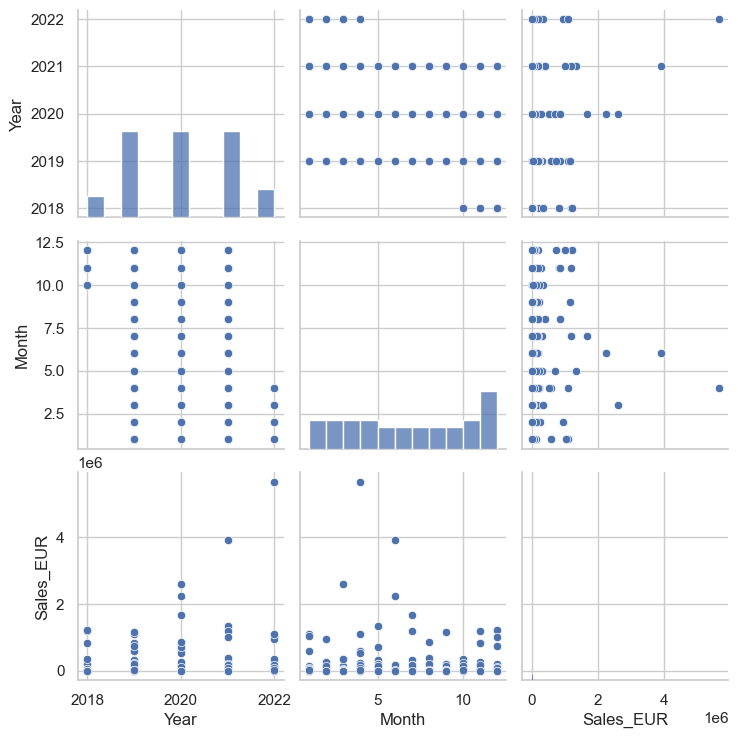

In [127]:
sns.pairplot(merged_data[potential_predictors + ['Sales_EUR']])
plt.show()

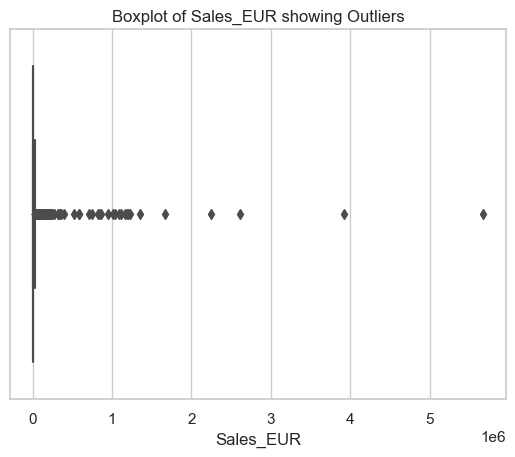

In [129]:
# Calculate the IQR (Interquartile Range)
Q1 = merged_data['Sales_EUR'].quantile(0.25)
Q3 = merged_data['Sales_EUR'].quantile(0.75)
IQR = Q3 - Q1

# Determine upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier rows
outlier_rows = merged_data[(merged_data['Sales_EUR'] < lower_bound) | (merged_data['Sales_EUR'] > upper_bound)]

# Visualize the outliers
sns.boxplot(x=merged_data['Sales_EUR'])
plt.title('Boxplot of Sales_EUR showing Outliers')
plt.show()

In [130]:
from scipy.stats.mstats import winsorize

# Winsorize sales data to limit extreme values
merged_data['Sales_EUR_Winsorized'] = winsorize(merged_data['Sales_EUR'], limits=[0.05, 0.05])

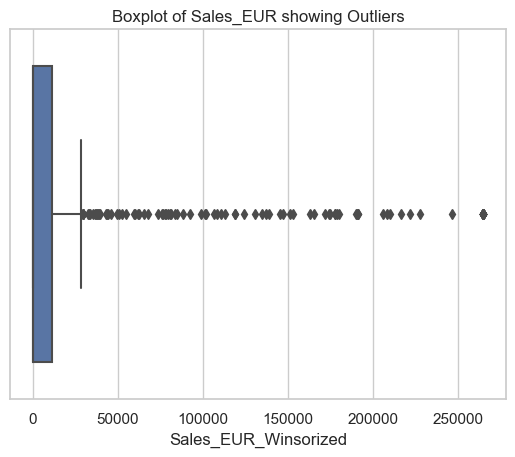

In [131]:
sns.boxplot(x=merged_data['Sales_EUR_Winsorized'])
plt.title('Boxplot of Sales_EUR showing Outliers')
plt.show()

In [136]:
outliers = merged_data[merged_data['Sales_EUR'] > upper_bound]  # upper_bound defined from earlier IQR method

# Inspect the outliers with respect to time and other indicators
print(outliers[['Month', 'Sales_EUR','Year','Mapped_GCK']])

     Month  Sales_EUR  Year Mapped_GCK
5       10   205995.0  2018        #16
1       10   340091.0  2018        #11
25      11    29807.0  2018         #6
19      11   828478.0  2018        #16
17      11    43677.0  2018        #13
..     ...        ...   ...        ...
576      3   340160.0  2022        #12
595      4  5674979.0  2022         #3
590      4   178141.0  2022        #12
589      4  1087630.0  2022        #11
593      4    76910.0  2022        #16

[109 rows x 4 columns]
